In [167]:
def Tatoo(TFD,T,alpha):
    N = len(TFD)
    dim = 16
    for i in range(0,2*dim):
        u = 128-dim+i
        for j in range (0,2*dim):
            v = 128-dim+j
            TFD[u,v] *= (1+alpha * T[i*dim+j])
            TFD[N-u,N-v] = np.conj(TFD[u,v])


    return TFD

def diff(TFD):
    N = len(TFD)
    Error = 0
    for i in range(0,N):
        for j in range (0,N):
            Error += abs(TFD[i,j] - np.conj(TFD[-i,-j]))


    return Error
    

In [168]:
import numpy as np
from matplotlib import pyplot as plt
import cv2

[[ 1.29411687  3.33889165  3.72014764 ...  7.57289508  3.72014764
   3.33889165]
 [ 8.41472517  2.02043576  4.84921677 ... 11.49903866  4.85078345
   5.33042305]
 [ 4.45190706  3.19757718  4.25199267 ...  5.5818514   2.61520933
   4.1294276 ]
 ...
 [ 8.39569814  5.37648437  5.86111585 ...  3.63486154  3.1482668
   4.70657273]
 [ 4.45190706  4.1294276   2.61520933 ...  8.14022457  4.25199267
   3.19757718]
 [ 8.41472517  5.33042305  4.85078345 ...  4.90064623  4.84921677
   2.02043576]]


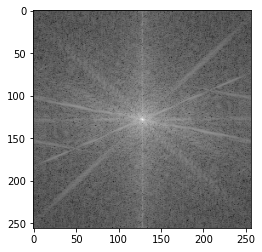

In [169]:
I = plt.imread('cameraman.png')
TFimage = np.fft.fft2(I)
TFimage = np.fft.fftshift(TFimage)
TFimageAbs = abs(TFimage)
print(TFimageAbs)

plt.imshow(np.log(TFimageAbs), cmap ='gray')



7.975460330799981e-10 8.340014430686372e-10


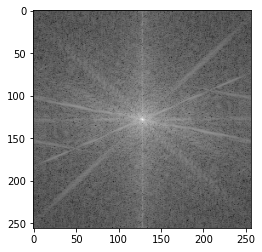

In [170]:
T = np.random.randn(1024)

Error2 = diff(TFimage)
TFD = Tatoo(TFimage,T,0.01)
Error = diff(TFD)
TFDabs = abs(TFD)
print(Error, Error2)
plt.imshow(np.log(TFDabs), cmap ='gray')

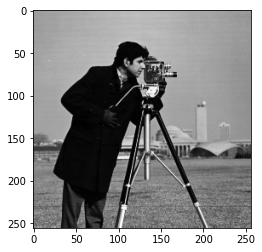

In [171]:

TFDtild= np.fft.ifftshift(TFD)
newImage = np.fft.ifft2(TFDtild)
plt.imshow(abs(newImage), cmap = 'gray')








0.99215686


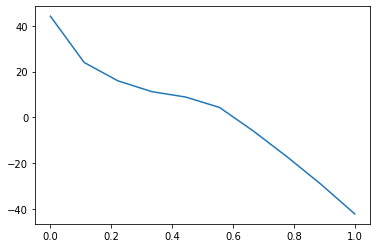

In [172]:
max1 = np.max(I)
print(max1)
N = len(I)
sum = 0
MSE = []
for k in range(0,10):
    TFD = Tatoo(TFimage,T,k/10)
    TFDtild= np.fft.ifftshift(TFD)
    newImage = abs(np.fft.ifft2(TFDtild))
    MSE.append(np.square(np.subtract(I,newImage.real)).mean())
    #for i in range (0,N):
     #   for j in range (0,N):
      #      sum += (I[i,j] - newImage[i,j])*(I[i,j] - newImage[i,j])
            #print(sum)
    #MSE.append(1/(N*N) * sum)

PSNR = []
for i in range(0,len(MSE)):
    PSNR.append(10*np.log10(max1*max1/MSE[i]))

alpha = np.linspace(0,1,len(PSNR))
plt.plot(alpha,PSNR)